In [4]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

In [5]:
import seaborn as sns

In [6]:
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv("fund-raising.csv")

In [8]:
df.head()

,contrib,gapmos,promocontr,mincontrib,ncontrib,maxcontrib,lastcontr,avecontr,mailord,mindate,maxdate,age,gender
0,4.0,12,10,2.0,15,7.0,5.0,4.066667,10,8801,9404,62,F
1,5.0,3,14,3.0,21,6.0,5.0,4.857143,5,9312,9404,66,F
2,13.0,21,5,5.0,12,17.0,10.0,11.000000,0,9001,9503,69,F
3,10.0,6,8,5.0,10,12.0,12.0,9.400000,10,9209,9509,73,M
4,10.0,7,2,10.0,3,15.0,10.0,11.666667,0,9511,9508,58,F


In [9]:
df['contrib'].unique()

array([  4.  ,   5.  ,  13.  ,  10.  ,  20.  ,  16.  ,  26.  ,   7.  ,
         3.  ,  60.  ,  15.  ,  23.  ,   6.  ,  11.  ,  16.87,   2.5 ,
        50.  ,  10.7 ,  35.  ,  14.  ,  21.  ,   2.  ,  12.  ,  25.  ,
        19.  ,  40.  ,  38.  ,  18.  ,  17.  ,  12.5 ,   7.5 ,   1.  ,
         9.  ,  36.  ,   8.  ,  30.  ,  22.  ,  24.  ,  41.  ,  51.  ,
        28.  ,  43.  ,  31.  , 100.  ,  32.  ,  33.  ,  45.  ,  47.  ,
        37.  ,  18.25,  27.  ,  13.92,  46.  , 200.  ,  44.  ,  75.  ,
        53.  ,  29.  ,  17.5 ,  34.  ,   4.5 ,  42.  ,  55.  , 102.  ])

In [10]:
df['gender'].unique()

array(['F', 'M', 'U'], dtype=object)

In [11]:
corr = df.corr()

In [12]:
corr

,contrib,gapmos,promocontr,mincontrib,ncontrib,maxcontrib,lastcontr,avecontr,mailord,mindate,maxdate,age
contrib,1.000000,0.112192,-0.214586,0.407175,-0.211630,0.414476,0.746451,0.663092,0.018597,-0.065409,0.131160,-0.025829
gapmos,0.112192,1.000000,-0.122663,0.101264,-0.138969,0.043845,0.109052,0.120501,0.024835,-0.086470,0.011983,-0.032028
promocontr,-0.214586,-0.122663,1.000000,-0.377991,0.897084,-0.043710,-0.194761,-0.289574,0.006408,-0.364224,-0.393935,0.196177
mincontrib,0.407175,0.101264,-0.377991,1.000000,-0.370177,0.237322,0.441218,0.703515,-0.003198,0.278263,0.087067,-0.089005
ncontrib,-0.211630,-0.138969,0.897084,-0.370177,1.000000,0.026248,-0.193359,-0.268200,0.002570,-0.305664,-0.389773,0.199914
maxcontrib,0.414476,0.043845,-0.043710,0.237322,0.026248,1.000000,0.514442,0.535534,0.029185,-0.056513,-0.006831,0.021743
lastcontr,0.746451,0.109052,-0.194761,0.441218,-0.193359,0.514442,1.000000,0.766460,0.044186,-0.103314,0.158253,-0.025513
avecontr,0.663092,0.120501,-0.289574,0.703515,-0.268200,0.535534,0.766460,1.000000,0.029075,0.027796,0.037038,-0.050179
mailord,0.018597,0.024835,0.006408,-0.003198,0.002570,0.029185,0.044186,0.029075,1.000000,0.010814,0.013036,0.108515
mindate,-0.065409,-0.086470,-0.364224,0.278263,-0.305664,-0.056513,-0.103314,0.027796,0.010814,1.000000,0.134658,-0.145311


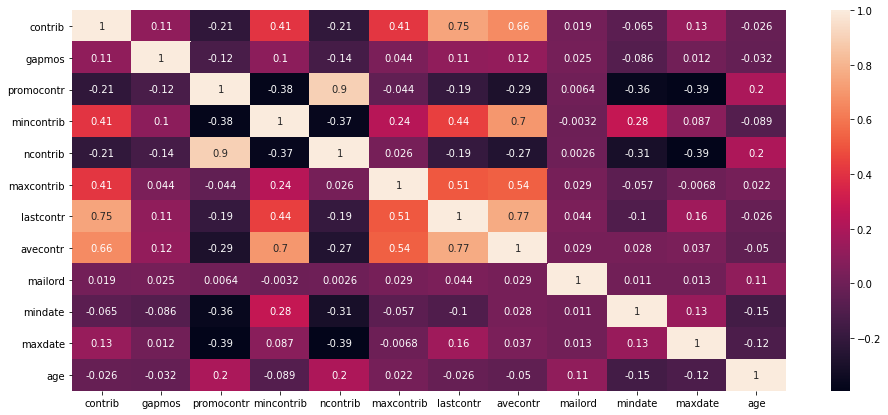

In [13]:
plt.figure(figsize = (16,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [14]:
df.columns

Index(['contrib', 'gapmos', 'promocontr', 'mincontrib', 'ncontrib',
       'maxcontrib', 'lastcontr', 'avecontr', 'mailord', 'mindate', 'maxdate',
       'age', 'gender'],
      dtype='object')

# Model 1 - Using all predictors

In [15]:
y, X = dmatrices('contrib  ~ gapmos + promocontr + mincontrib + ncontrib + \
                 maxcontrib + lastcontr + avecontr + mailord + mindate + maxdate +age + gender', 
                 data=df, return_type='dataframe')

In [16]:
X.head()

,Intercept,gender[T.M],gender[T.U],gapmos,promocontr,mincontrib,ncontrib,maxcontrib,lastcontr,avecontr,mailord,mindate,maxdate,age
0,1.0,0.0,0.0,12.0,10.0,2.0,15.0,7.0,5.0,4.066667,10.0,8801.0,9404.0,62.0
1,1.0,0.0,0.0,3.0,14.0,3.0,21.0,6.0,5.0,4.857143,5.0,9312.0,9404.0,66.0
2,1.0,0.0,0.0,21.0,5.0,5.0,12.0,17.0,10.0,11.000000,0.0,9001.0,9503.0,69.0
3,1.0,1.0,0.0,6.0,8.0,5.0,10.0,12.0,12.0,9.400000,10.0,9209.0,9509.0,73.0
4,1.0,0.0,0.0,7.0,2.0,10.0,3.0,15.0,10.0,11.666667,0.0,9511.0,9508.0,58.0


In [17]:
y.head()

,contrib
0,4.0
1,5.0
2,13.0
3,10.0
4,10.0


In [18]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                contrib   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     368.5
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:07:45   Log-Likelihood:                -11907.
No. Observations:                3470   AIC:                         2.384e+04
Df Residuals:                    3456   BIC:                         2.393e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0676      8.918      0.120      

In [19]:
res.rsquared_adj

0.5793132026110206

## Model 2 - Using only 2 predictors

In [20]:
y, X = dmatrices('contrib  ~  lastcontr + avecontr', 
                 data=df, return_type='dataframe')

In [21]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                contrib   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     2367.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:07:45   Log-Likelihood:                -11922.
No. Observations:                3470   AIC:                         2.385e+04
Df Residuals:                    3467   BIC:                         2.387e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0653      0.244      8.465      0.0

## Model 3 - Using only 1 predictor

In [22]:
y, X = dmatrices('contrib  ~  lastcontr ', 
                 data=df, return_type='dataframe')

In [23]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                contrib   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     4364.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:07:45   Log-Likelihood:                -12002.
No. Observations:                3470   AIC:                         2.401e+04
Df Residuals:                    3468   BIC:                         2.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5230      0.221     15.947      0.0

In [24]:
###############################################

In [25]:
##################################################

In [27]:
#####################################################

In [ ]:
##################################################

In [ ]:
###############################################

### HW - Income 1 (Effect of Education)

In [35]:
df_inc1 = pd.read_csv("Income1.csv")

In [36]:
y, X = dmatrices('Income  ~  Education ', 
                 data=df_hw, return_type='dataframe')

In [37]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     377.6
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           8.63e-18
Time:                        08:14:57   Log-Likelihood:                -93.500
No. Observations:                  30   AIC:                             191.0
Df Residuals:                      28   BIC:                             193.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.4463      4.725     -8.349      0.0

### HW - Income 2 (Effect of Education and one other)

In [40]:
df_inc2 = pd.read_csv("Income2.csv")

In [41]:
y, X = dmatrices('Income  ~  Education + Seniority ', 
                 data=df_inc2, return_type='dataframe')

In [42]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     191.4
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           1.13e-16
Time:                        08:16:04   Log-Likelihood:                -100.15
No. Observations:                  30   AIC:                             206.3
Df Residuals:                      27   BIC:                             210.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.0856      5.999     -8.349      0.0